# ANÁLISE QUANTITATIVA DE CURRÍCULOS LATTES

Este Notebook Jupyter importa uma coleção de Currículos Lattes e executa um método analítico de agrupamento de dados com base na premissa de que há perfis médios de publicação a serem encontrados nesta coleção de Currículos Lattes.

A primeira linha de código importa a biblioteca LattesLab Python a ser usada pelo Notebook.

In [1]:
import LattesLab as ll

Agora, o endereço da pasta contendo os currículos Lattes é passado para a variável "folder".

In [2]:
#folder= "D:\\thiag\\Documents\\INPE\\Research\\Datasets\\DoutoresEngenharias\\Eng2\\"
folder = "D:\\thiag\\Documents\\INPE\\Research\\Datasets\\PIBIC"

Agora que a pasta onde estão os arquivos é conhecida, a matriz de dados (dataframe) com as informações dos Currículos Lattes para essa análise pode ser obtida dos arquivos da pasta.

A segunda linha da célula abaixo salva o dataframe original para referência futura, se necessário.

As primeiras linhas do dataframe são exibidas duas células abaixo.

In [3]:
lattesframe = ll.get_dataframe_from_folders(folder, True)

cleandata = lattesframe

In [4]:
lattesframe.head()

,Nome,lattesId,nacionalidade,atualizado,quantasVezesPIBIC,anoPrimeiroPIBIC,quantasGrad,anoPrimeiraGrad,quantosM,anoPrimeiroM,...,papers2008,papers2007,papers2006,papers2005,papers2004,papers2003,papers2002,papers2001,papers2000,papers1999
0,Jefferson Alves Nogueira da Silva,2343264179453388,BRA,19112015,1,2014,1,2016,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Regiane Donizeti de Souza Martinez,6415449764506678,Unspecified,11042013,0,0,1,2014,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Henrique de oliveira euclides,6379773511956669,BRA,30052017,0,0,1,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Priscila Mayumi Pereira Yaguinuma,5165674175821428,Unspecified,04072013,0,0,1,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ádanna de Souza Andrade,8867021322241509,BRA,25032017,0,0,1,2016,0,0,...,0,0,0,0,0,0,0,0,0,0


Como as datas das publicações dos Currículos Lattes pode variar, é interessante realizar um filtro do dataframe pelas publicações entre duas datas dadas.

In [5]:
refdate1 = ''
refdate2 = ''
lattesframe = ll.filter_by_date(lattesframe, refdate1, refdate2)

Upper-limit date invalid. Using default date of today.
Lower-limit date invalid. Using default date of 01/01/1900.


Também pode ser interessante verificar a idade dos Currículos Lattes. Para isso, a função lattes_age gera um histograma da idade de coleta do CV Lattes. É possível fornecer uma data de referência (por exemplo, a data em que os currículos Lattes foram obtidos).

Date format invalid. Using todays date as reference.


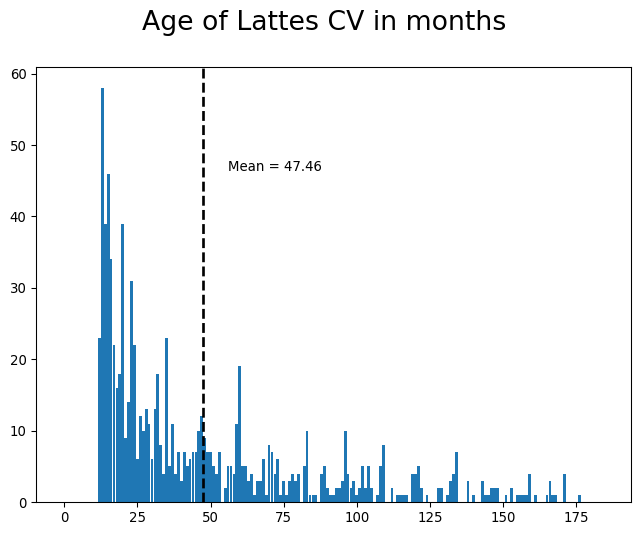

In [6]:
refdate3 = ''
ll.lattes_age(lattesframe, refdate3)

E se procurarmos saber quantos dos pesquisadores receberam uma bolsa de Iniciação Científica? A função lattes_pibics retorna um histograma da quantidade de bolsas recebidas no grupo de pesquisadores dos proprietários de Currículos Lattes.

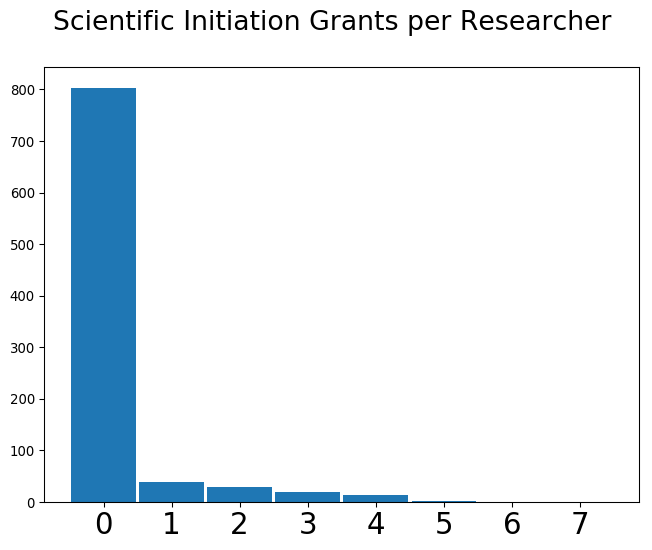

In [7]:
ll.lattes_pibics(lattesframe)

Também é possível quantificar o número de graduações concedidos por ano com a função degree_rate_year. Para esta função:
1. O primeiro parâmetro é o dataframe usado para gerar o histograma.
2. O segundo parâmetro é o grau desejado:

     g: para a graduação
    
     m: para mestrado
    
     d: para doutorado
    
     pd: para pós-doutorado

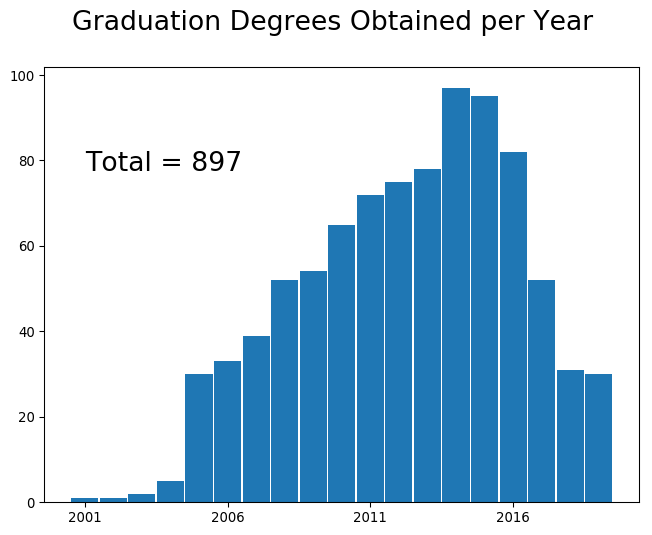

In [8]:
ll.degree_rate_year(lattesframe, 'g')

A função lattes_grad_level verifica dentro do dataframe qual é o grau mais alto ganho por cada pesquisador.

<Figure size 768x576 with 0 Axes>

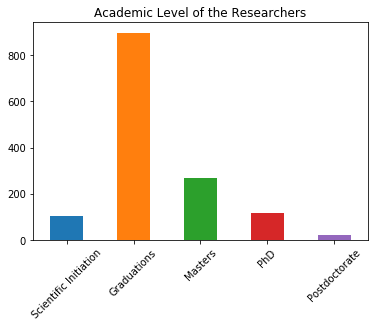

In [9]:
ll.lattes_grad_level(lattesframe)

O dataframe original contém dados que não são necessários para verificar a existência de perfis médios de publicação. Para filtrar os dados para essa análise, a função get_pub_year_data é usada e as primeiras linhas do dataframe resultante são exibidas.

In [10]:
pubdata = ll.get_pub_year_data(lattesframe)

In [11]:
pubdata.head()

,year,year2,year3,year4,year5,year6,year7,year8,year9,year10,year11,year12,year13,year14,year15,year16,year17,year18,year19,year20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,10,2,0,0


Esses dados também podem ser modificados de acordo com a análise desejada. Conforme apresentado, os dados mostram a quantidade de artigos e trabalhos publicados por um determinado pesquisador em um determinado ano. Dependendo da faixa de anos do dataframe, algumas comparações podem não ser viáveis: por exemplo, comparando dois pesquisadores que não estavam produzindo no mesmo intervalo de tempo. Portanto, a função first_nonzero ajuda a tornar o dataframe mais adequado para uma determinada análise.


O primeiro parâmetro da função é o dataframe 'pubdata' acima, o segundo parâmetro é o nome da coluna do dataframe 'lattesframe' que contém o ano em que os pesquisadores obtiveram sua primeira Bolsa de Iniciação Científica e o terceiro é o parâmetro que controla como os dados de publicação são formatado:
- Se opção = 0: a análise é baseada no ano-calendário, o que deixa o quadro inalterado.
- Se option = 1: o primeiro valor de produção é o primeiro valor diferente de zero do vetor pubdata. Assim, o histórico de publicação só passa ser contado a partir do ano em que o pesquisador fez sua primeira publicação. Os últimos índices vetoriais são substituídos por zeros.
- Se opção = 2: o primeiro ano de produção é o primeiro ano da bolsa de Iniciação Científica. Só faz sentido usá-lo em análises de dados baseados em pesquisadores de Iniciação Científica.

In [12]:
ll.first_nonzero(pubdata, lattesframe['anoPrimeiroPIBIC'], 0)

Na posse do dataframe de publicação filtrado, a função set_fuzzycmeans_clstr é chamada, de modo que a análise Fuzzy C Means seja conduzida. Para mais informações sobre Fuzzy C Means, visite:

https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/cmeans.html


Os argumentos da função são, em ordem de entrada:

- imin: número mínimo de clusters (nesta análise, um cluster é um perfil médio de publicação).
- imax: número máximo de clusters.
- cleandata: o dataframe com os dados da publicação. Para preservar o dataframe original, uma nova variável 'cleandata' (com o conteúdo da variável 'pubdata') foi criada.

Analysis with all available data.


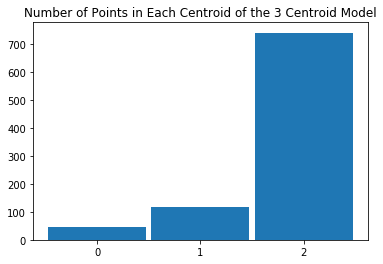

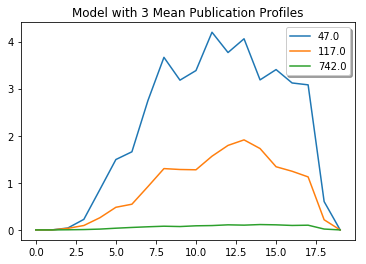

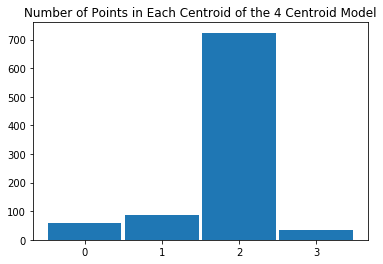

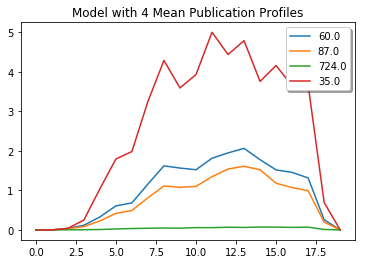

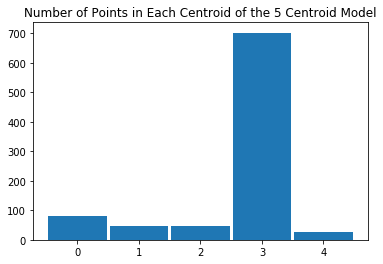

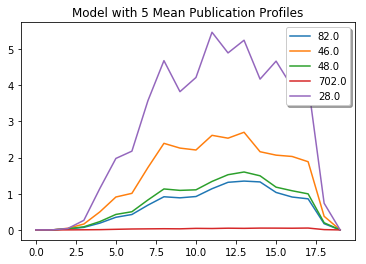

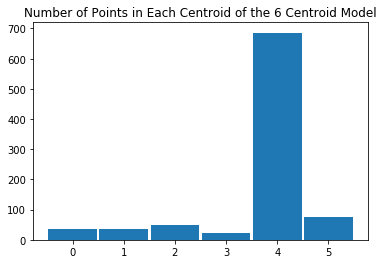

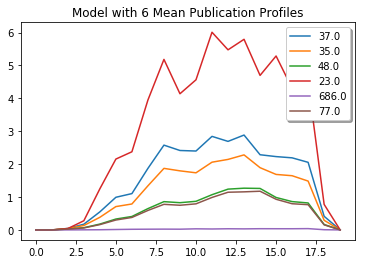

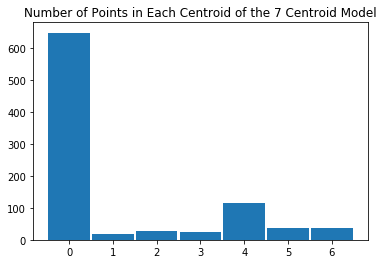

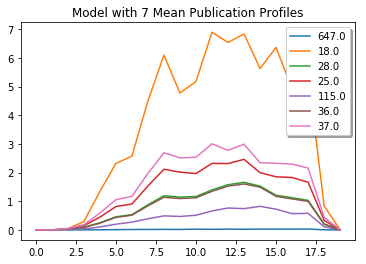

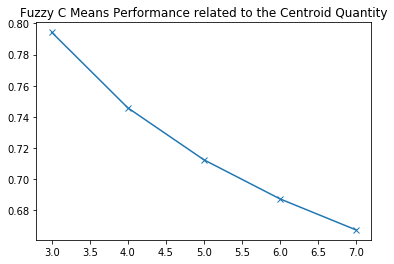

In [13]:
cleandata = pubdata
imin = 3
imax = 8
fpcs = []
centers = []
clusters = []

print('Analysis with all available data.')

centers, clusters, fpcs = ll.set_fuzzycmeans_clstr(imin, imax, cleandata)

A partir dos resultados acima, é possível ver que uma quantidade de pesquisadores encontrados neste dataframe tem zero publicações. Podemos repetir a análise, removendo esses pesquisadores dos dados.

O comando 'cleandata2 = cleandata[cleandata.sum(axis=1)!=0]' filtra os pesquisadores que têm a soma da produção anual ao longo dos anos como diferente de zero. Portanto, se a soma for zero para um determinado pesquisador, este pesquisador não fará parte deste dataframe.

Analysis with all researchers that have published at least once.


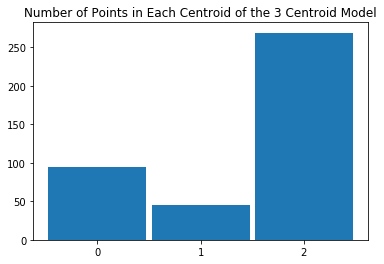

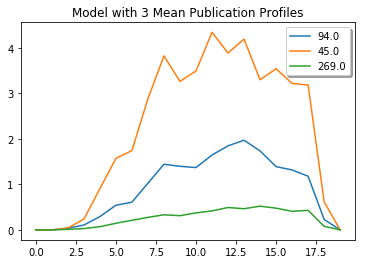

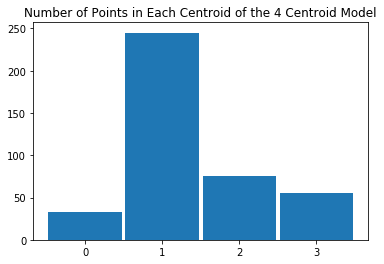

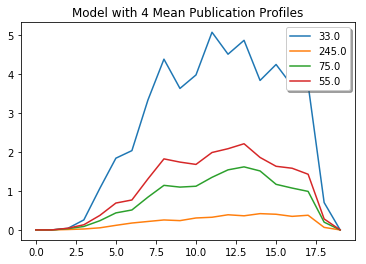

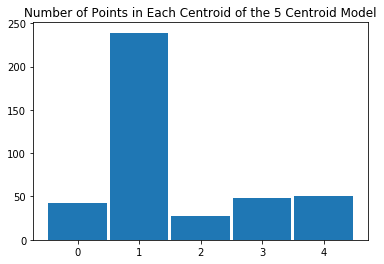

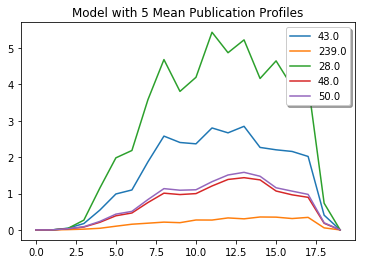

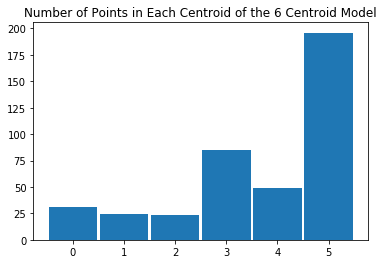

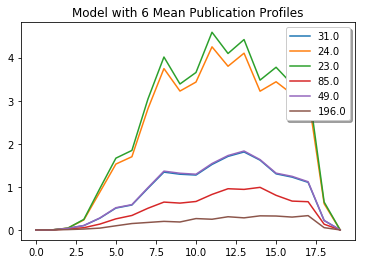

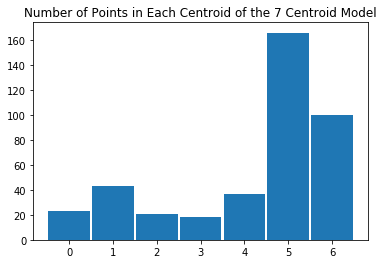

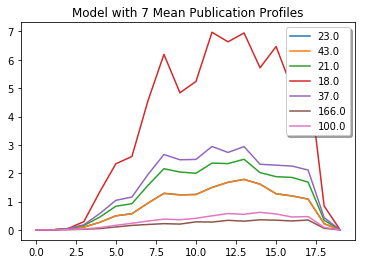

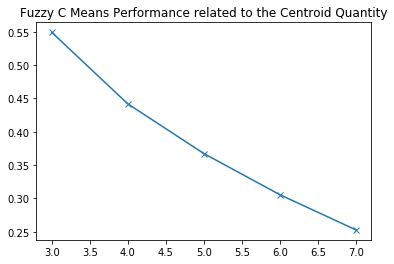

In [14]:
print('Analysis with all researchers that have published at least once.')
cleandata2 = cleandata[cleandata.sum(axis=1)!=0]
fpcs2 = []
centers2 = []
clusters2 = []

centers2, clusters2, fpcs2 = ll.set_fuzzycmeans_clstr(imin, imax, cleandata2)